In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import *
from sklearn.metrics import *
from sklearn.preprocessing import *
import warnings
warnings.filterwarnings("ignore")

In [190]:
df = pd.read_csv("Turbine_Data.csv")

In [191]:
df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [192]:
df_1 = df.set_index("Unnamed: 0")
df_1.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [193]:
df_1.duplicated().sum()

23039

In [194]:
df_2 = df_1.drop_duplicates()
df_2.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [195]:
pp = df_2.nunique()
pp

ActivePower                     94084
AmbientTemperatue               93678
BearingShaftTemperature         62286
Blade1PitchAngle                38946
Blade2PitchAngle                39021
Blade3PitchAngle                39021
ControlBoxTemperature               1
GearboxBearingTemperature       62313
GearboxOilTemperature           62412
GeneratorRPM                    61074
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62424
HubTemperature                  38119
MainBoxTemperature              49145
NacellePosition                  6664
ReactivePower                   94040
RotorRPM                        59254
TurbineStatus                     353
WTG                                 1
WindDirection                    6664
WindSpeed                       94224
dtype: int64

In [196]:
one_unique_value_cols = pp[pp==1].index.values
df_3 = df_2.drop(columns=one_unique_value_cols)
df_3.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,345.000000,2.026754


In [197]:
df_3.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94624.000000,93698.000000,62380.000000,41987.000000,41882.000000,41882.000000,62402.000000,62430.000000,62287.000000,62419.000000,62441.000000,62268.000000,62369.000000,72108.000000,94622.000000,62119.000000,6.275900e+04,72108.000000,94469.000000
mean,619.036994,28.777569,43.105338,9.751759,10.038709,10.038709,64.376222,57.561706,1102.146658,72.462897,71.829134,36.979752,39.635107,196.307894,88.070309,9.908585,2.284016e+03,196.307894,5.879193
std,610.917748,4.358470,5.168850,20.646533,20.272100,20.272100,10.020754,6.324124,527.967896,22.626685,22.649494,4.884101,5.428555,88.279316,116.498176,4.717546,3.590288e+05,88.279316,2.617241
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,80.098952,25.625603,39.856871,-0.939896,-0.433316,-0.433316,57.925129,53.944023,1029.812895,55.492241,54.763998,33.977709,35.843574,145.000000,-0.433723,9.231097,2.000000e+00,145.000000,3.824572
50%,402.880706,28.338961,42.927465,0.395038,0.889782,0.889782,64.862406,57.197064,1124.930500,65.792061,65.006679,37.003815,39.500759,182.000000,35.938526,10.099272,2.000000e+00,182.000000,5.558520
75%,1073.979105,31.665910,47.018075,8.101939,8.481306,8.481306,71.104401,61.307270,1515.517020,85.874609,85.342714,40.009538,43.370342,271.000000,147.190453,13.600908,2.000000e+00,271.000000,7.505555
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [198]:
df_4 = df_3[df_3["ActivePower"]>=0]
df_4.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,
2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,3.976499,NaN,NaN,252.00,3.042750
2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,11.091660,NaN,NaN,255.00,3.424814
2018-01-01 06:50:00+00:00,40.889650,28.984758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.75,4.234497,NaN,NaN,264.75,3.507172
2018-01-01 10:40:00+00:00,34.398111,30.282058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.75,5.347792,NaN,NaN,283.75,3.442212
2018-01-01 12:00:00+00:00,29.797653,29.333519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,6.022326,NaN,NaN,274.00,3.031363


In [199]:
(df_4.isna().sum() * 100 / df_4.isna().sum().sum()).round(2)

ActivePower                     0.00
AmbientTemperatue               0.23
BearingShaftTemperature         6.09
Blade1PitchAngle                9.83
Blade2PitchAngle                9.85
Blade3PitchAngle                9.85
GearboxBearingTemperature       6.09
GearboxOilTemperature           6.09
GeneratorRPM                    6.09
GeneratorWinding1Temperature    6.09
GeneratorWinding2Temperature    6.09
HubTemperature                  6.12
MainBoxTemperature              6.10
NacellePosition                 4.64
ReactivePower                   0.01
RotorRPM                        6.09
TurbineStatus                   6.01
WindDirection                   4.64
WindSpeed                       0.07
dtype: float64

In [200]:
df_4

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,
2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,3.976499,NaN,NaN,252.00,3.042750
2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,11.091660,NaN,NaN,255.00,3.424814
2018-01-01 06:50:00+00:00,40.889650,28.984758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.75,4.234497,NaN,NaN,264.75,3.507172
2018-01-01 10:40:00+00:00,34.398111,30.282058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.75,5.347792,NaN,NaN,283.75,3.442212
2018-01-01 12:00:00+00:00,29.797653,29.333519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,6.022326,NaN,NaN,274.00,3.031363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.00,13.775785,9.234004,2.0,178.00,3.533445
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.00,8.088928,9.229370,2.0,178.00,3.261231
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.00,4.355978,9.236802,2.0,178.00,3.331839


In [201]:
df_5 = df_4.reset_index()
df_5

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,3.976499,NaN,NaN,252.00,3.042750
1,2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,11.091660,NaN,NaN,255.00,3.424814
2,2018-01-01 06:50:00+00:00,40.889650,28.984758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.75,4.234497,NaN,NaN,264.75,3.507172
3,2018-01-01 10:40:00+00:00,34.398111,30.282058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.75,5.347792,NaN,NaN,283.75,3.442212
4,2018-01-01 12:00:00+00:00,29.797653,29.333519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,6.022326,NaN,NaN,274.00,3.031363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78984,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.00,13.775785,9.234004,2.0,178.00,3.533445
78985,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.00,8.088928,9.229370,2.0,178.00,3.261231
78986,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.00,4.355978,9.236802,2.0,178.00,3.331839
78987,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.00,12.018077,9.237374,2.0,190.00,3.284468


In [202]:
df_6 = df_5.copy()
df_6["Unnamed: 0"] = pd.to_datetime(df_6["Unnamed: 0"])
df_6["date"] = df_6["Unnamed: 0"].dt.date
df_7 = df_6.drop(columns=["Unnamed: 0"])
df_8 = df_7.groupby(by="date").mean()
df_8

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
date,,,,,,,,,,,,,,,,,,,
2018-01-01,366.223561,25.528849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.727612,74.042120,NaN,NaN,276.727612,5.263797
2018-01-02,462.550740,25.357526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.105603,93.555723,NaN,NaN,274.105603,5.390719
2018-01-03,454.417752,24.379363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.369130,91.627843,NaN,NaN,286.369130,5.295225
2018-01-04,369.952190,24.912347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.445471,74.360621,NaN,NaN,284.445471,5.094994
2018-01-05,319.446595,23.535679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.013293,64.366148,NaN,NaN,292.013293,4.915224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,732.042233,29.991142,46.851910,0.329317,0.771003,0.771003,66.892063,58.317562,1297.720061,78.444640,77.648187,39.638837,42.410611,168.151865,120.420349,11.635693,2.000000,168.151865,6.245735
2020-03-27,728.896074,31.271816,47.044663,0.203444,0.610377,0.610377,66.698078,57.695450,1349.968294,78.444886,77.762830,39.771183,43.114876,178.605831,110.689811,12.104389,2.035211,178.605831,6.207374
2020-03-28,874.011580,31.056363,50.304065,0.866849,1.336831,1.336831,68.392850,59.037365,1360.576634,85.577585,84.772812,42.765696,42.512985,182.870152,140.359887,12.198428,89.763636,182.870152,6.776972


In [203]:
mms = MinMaxScaler()

df_9 = pd.DataFrame(mms.fit_transform(df_8),columns=df_8.columns,index=df_8.index)
df_9

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
date,,,,,,,,,,,,,,,,,,,
2018-01-01,0.212896,0.259584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.771125,0.218215,NaN,NaN,0.771125,0.208981
2018-01-02,0.268893,0.249121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.762462,0.273671,NaN,NaN,0.762462,0.220853
2018-01-03,0.264166,0.189383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802980,0.268192,NaN,NaN,0.802980,0.211920
2018-01-04,0.215063,0.221933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.796625,0.219120,NaN,NaN,0.796625,0.193190
2018-01-05,0.185703,0.137858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821629,0.190717,NaN,NaN,0.821629,0.176374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,0.425556,0.532103,0.817479,0.014095,0.014761,0.014761,0.763438,0.753237,0.739908,0.543258,0.537948,0.716306,0.682421,0.412392,0.350018,0.739612,1.210324e-07,0.412392,0.300834
2020-03-27,0.423727,0.610315,0.825098,0.012691,0.012958,0.012958,0.759644,0.737923,0.769698,0.543261,0.539233,0.723301,0.725272,0.446932,0.322365,0.769404,1.956122e-07,0.446932,0.297245
2020-03-28,0.508087,0.597157,0.953943,0.020091,0.021112,0.021112,0.792795,0.770955,0.775746,0.622631,0.617786,0.881586,0.688650,0.461021,0.406684,0.775382,1.860102e-04,0.461021,0.350527


In [204]:
features_required = df_9.columns.values.tolist()[1:]
target_required = df_9.columns.values.tolist()[0]
print("Features : ")
print(features_required)
print()
print("Target   : ")
print(target_required)

Features : 
['AmbientTemperatue', 'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WindDirection', 'WindSpeed']

Target   : 
ActivePower


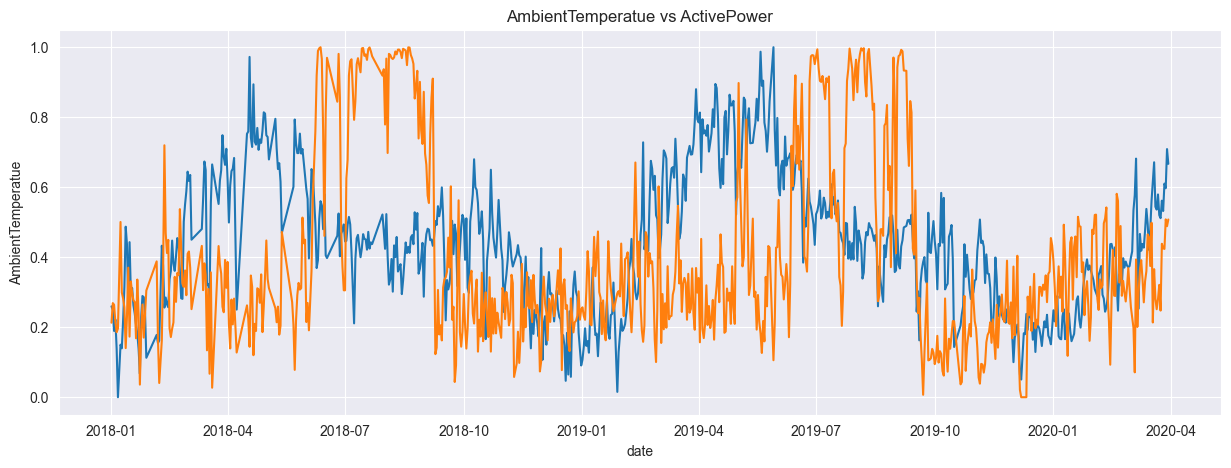

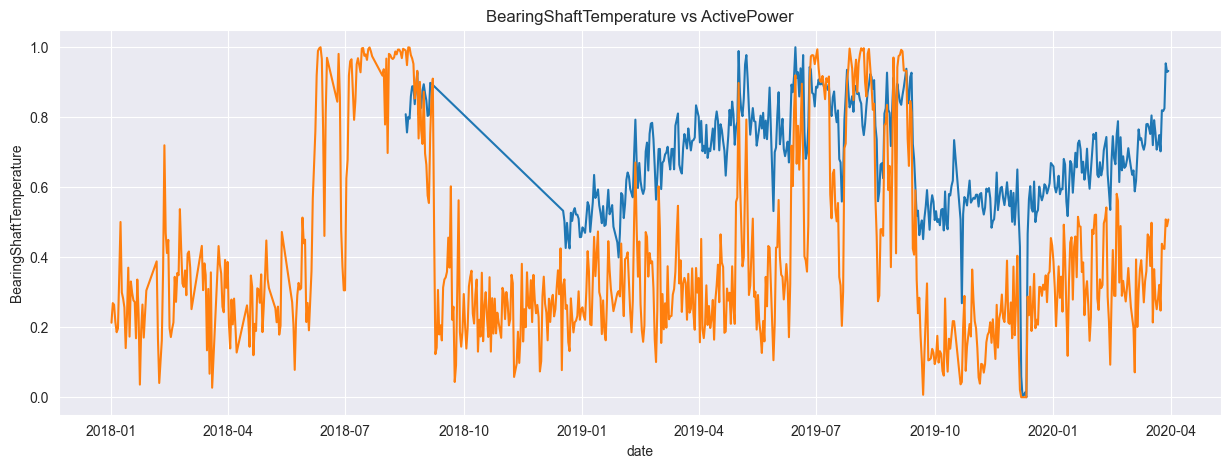

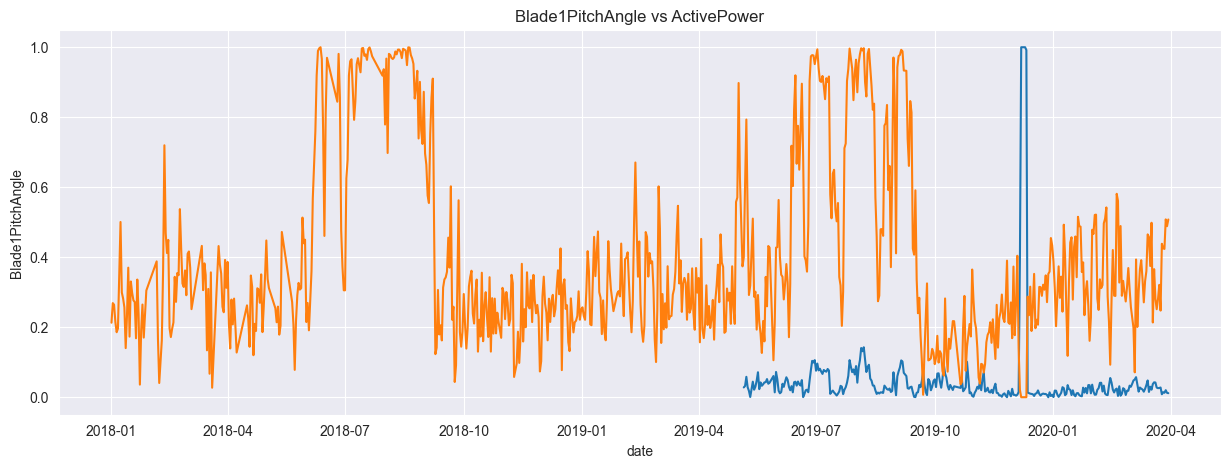

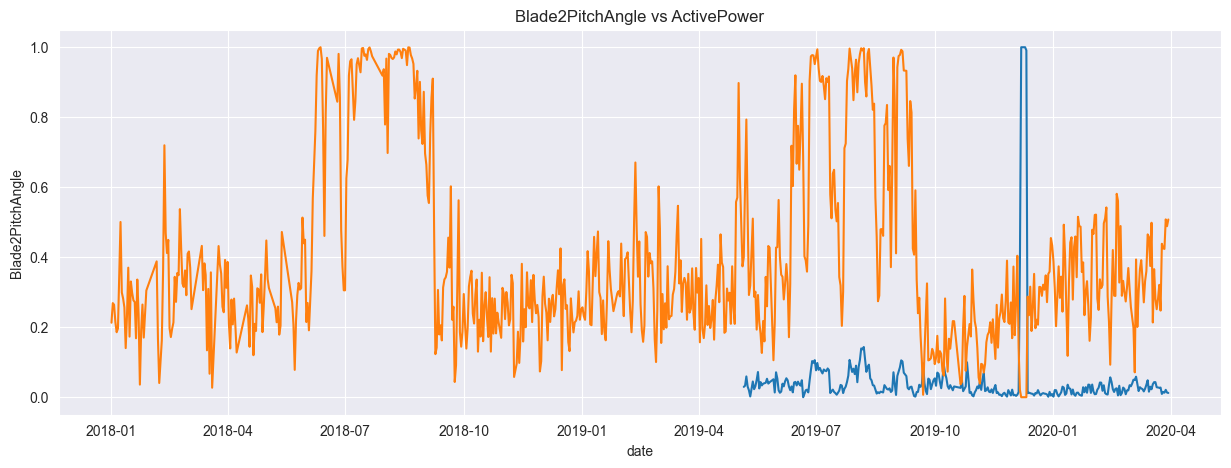

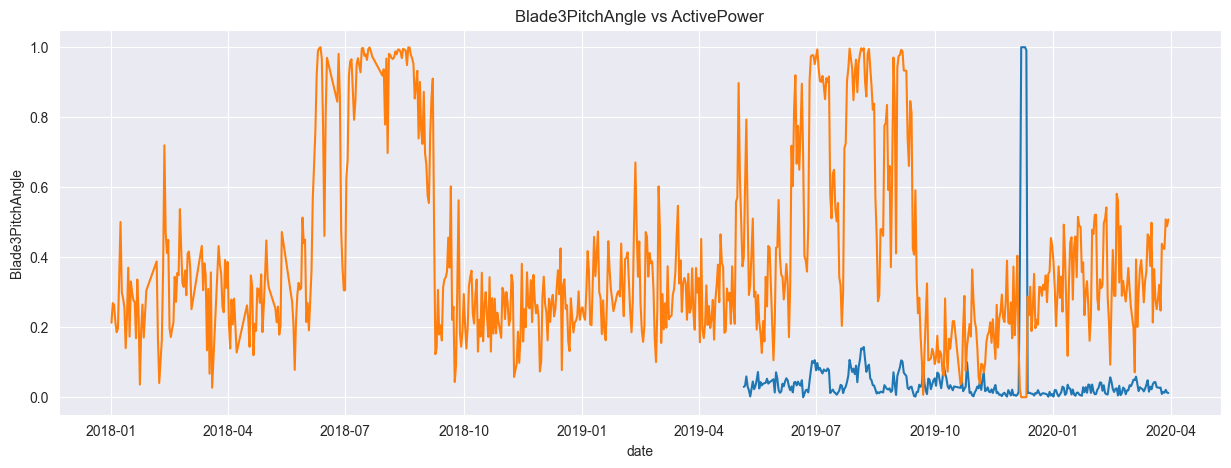

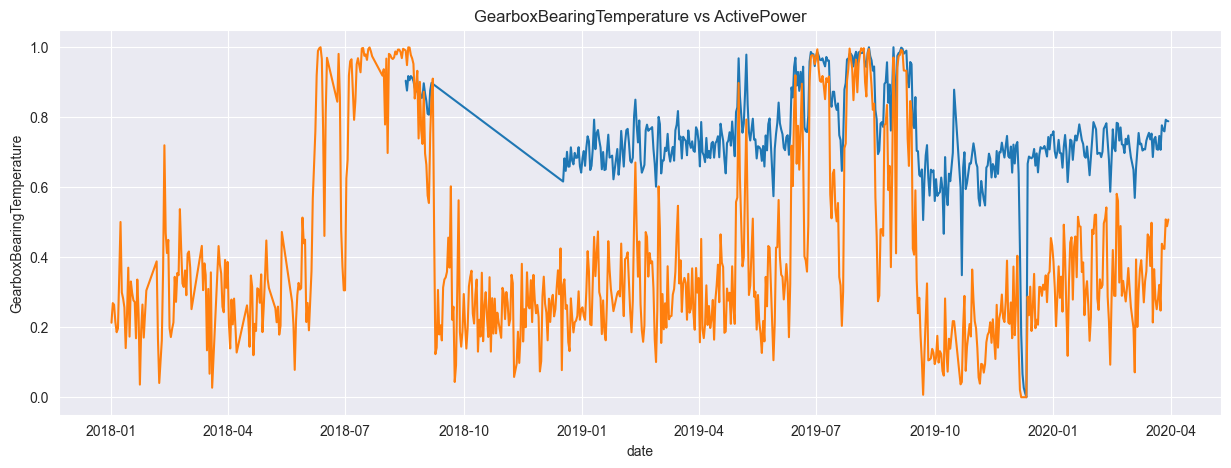

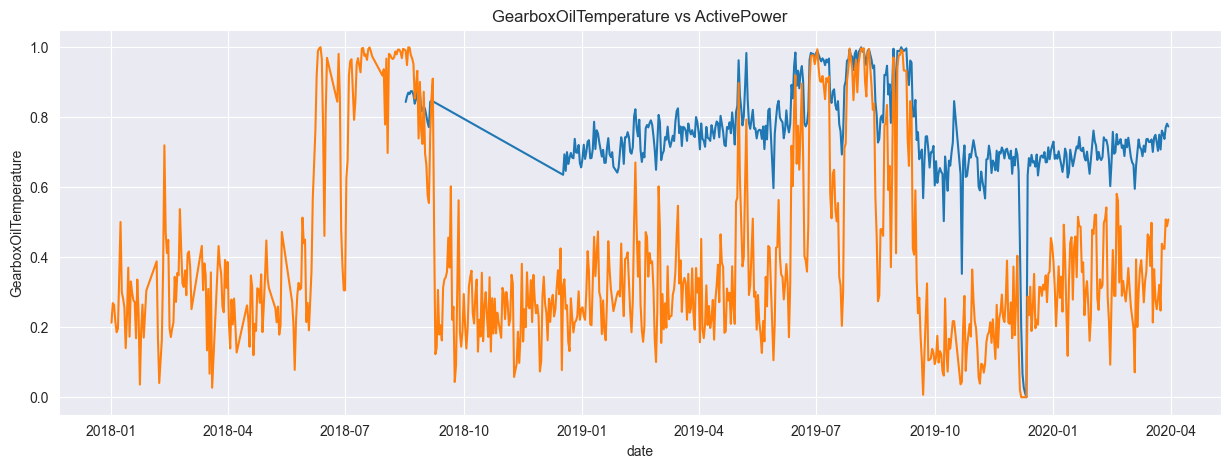

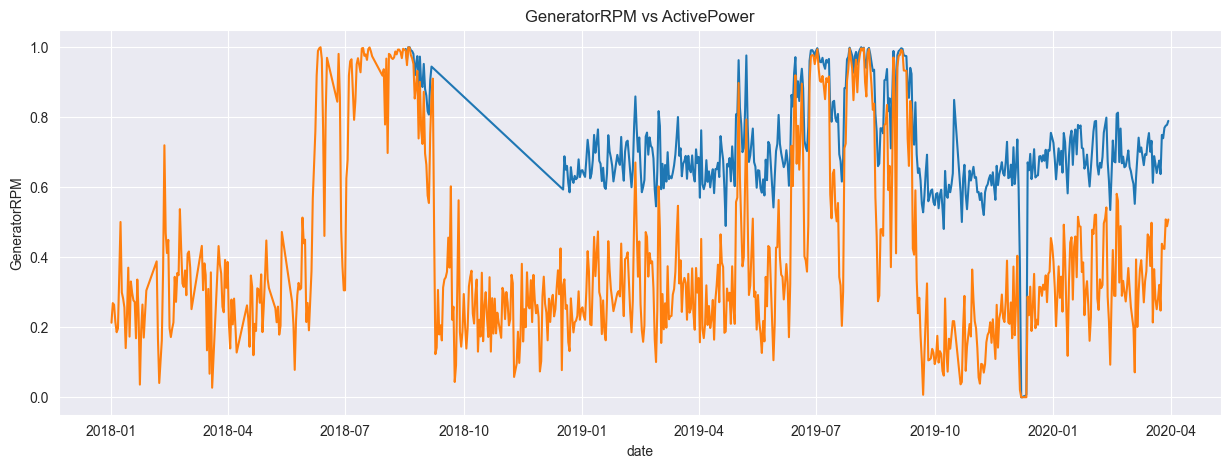

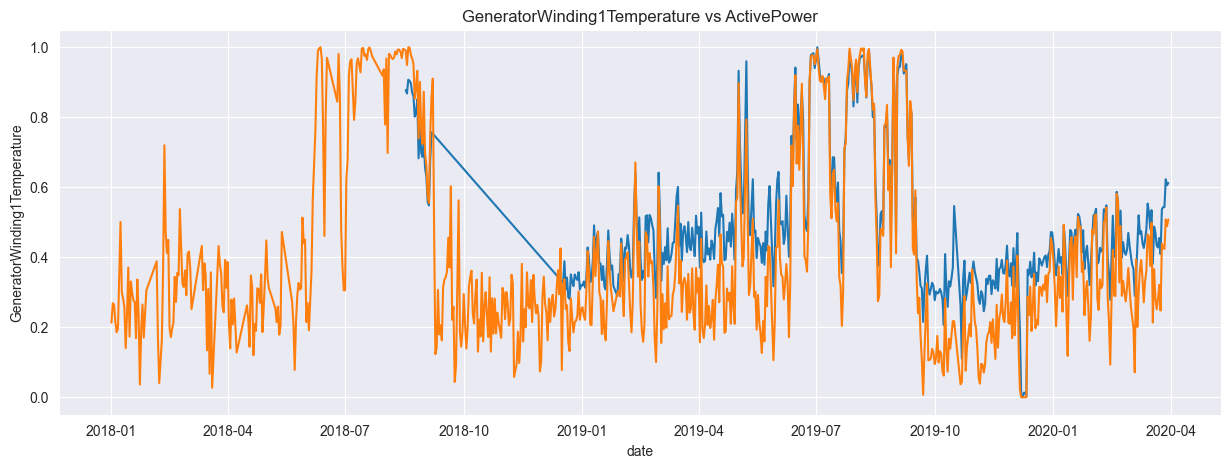

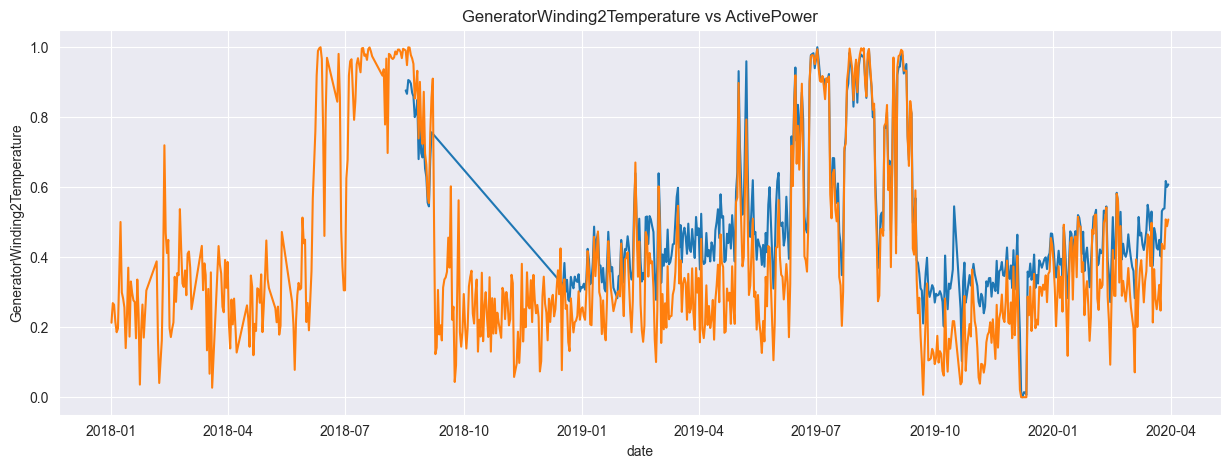

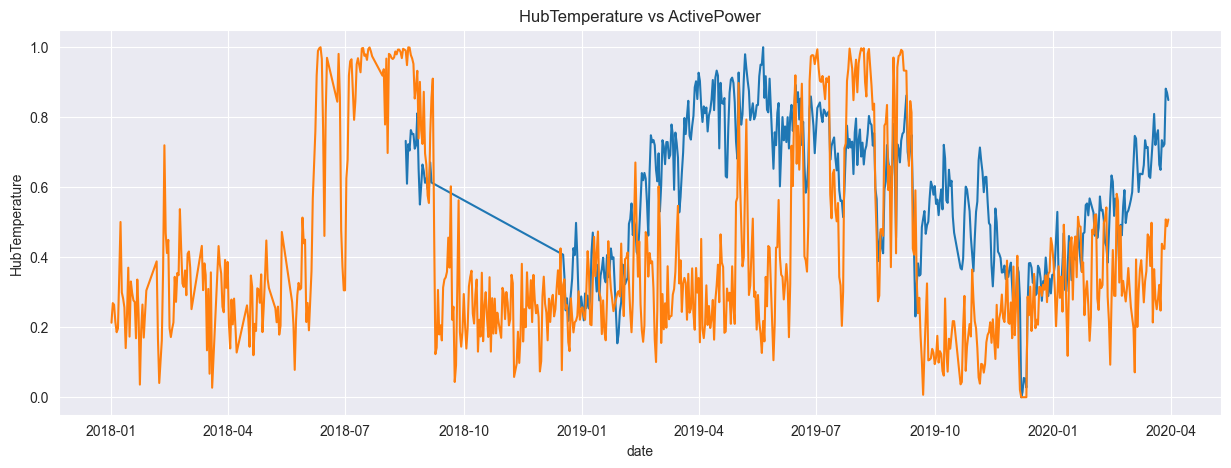

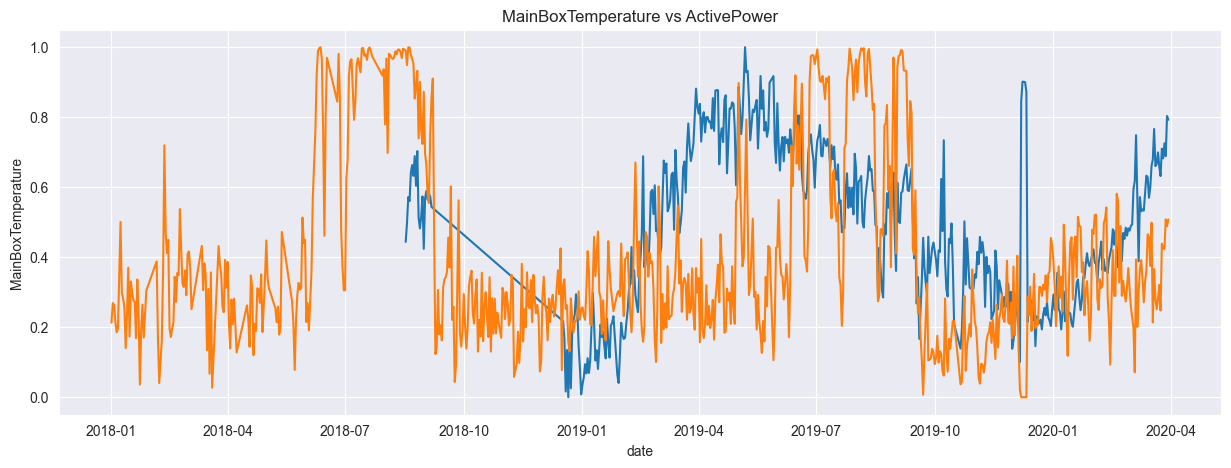

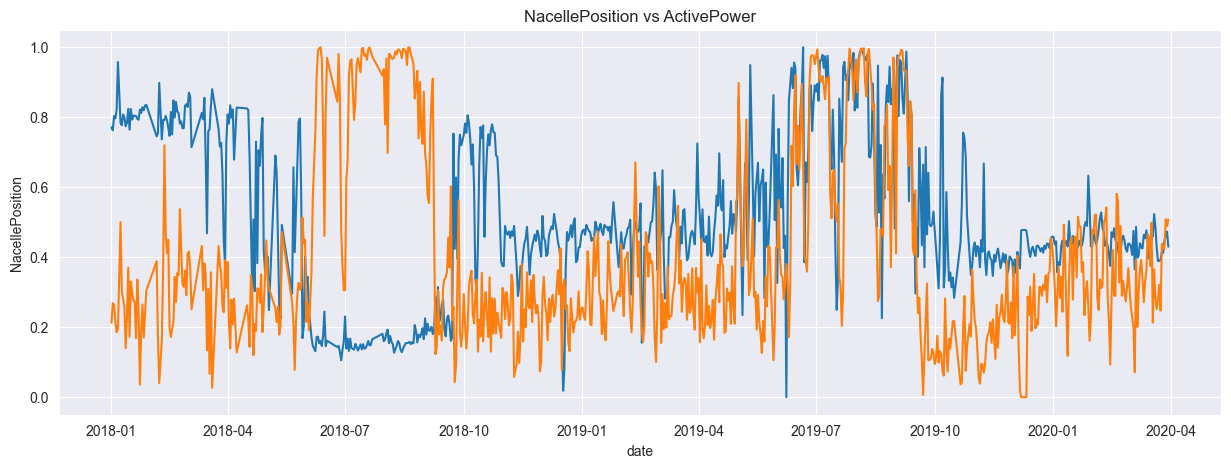

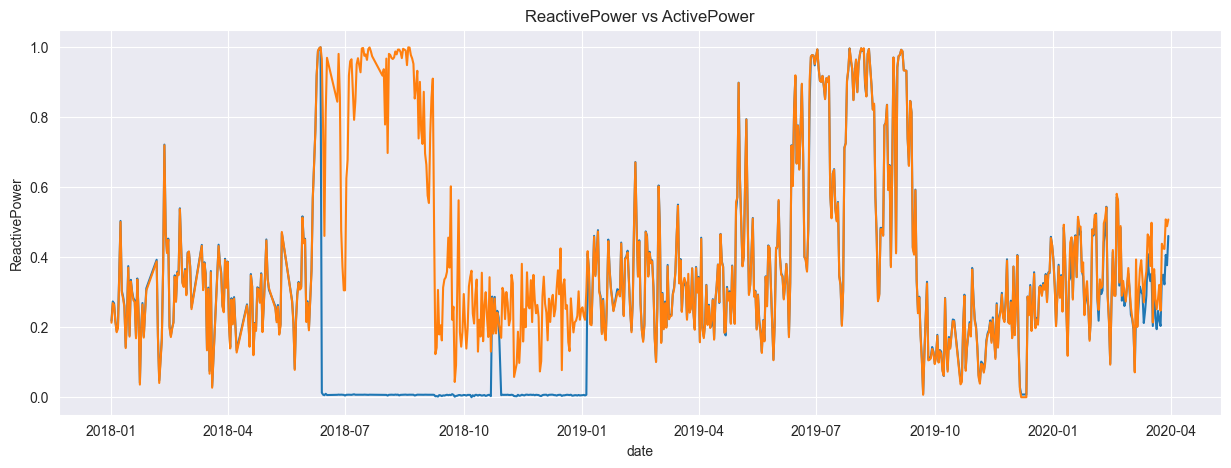

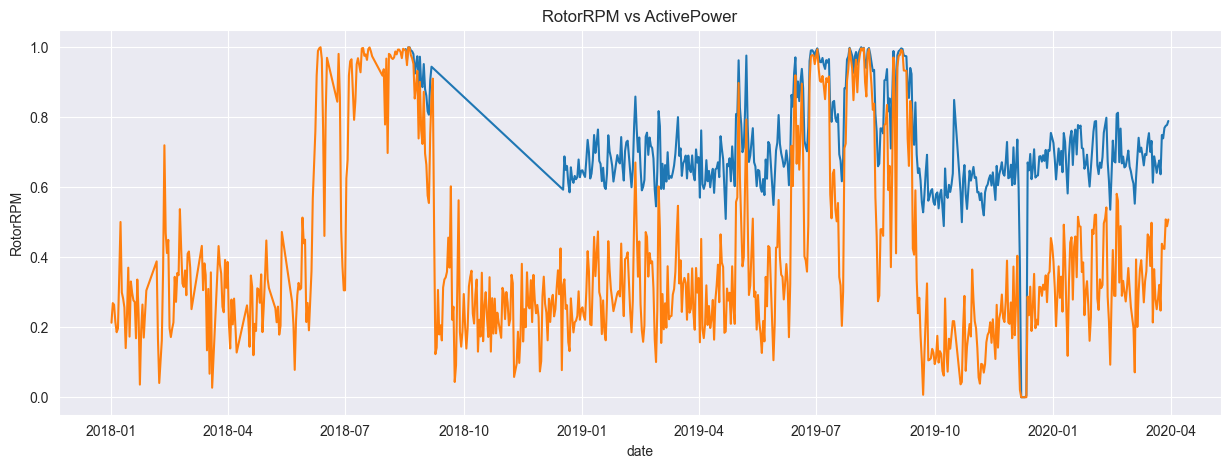

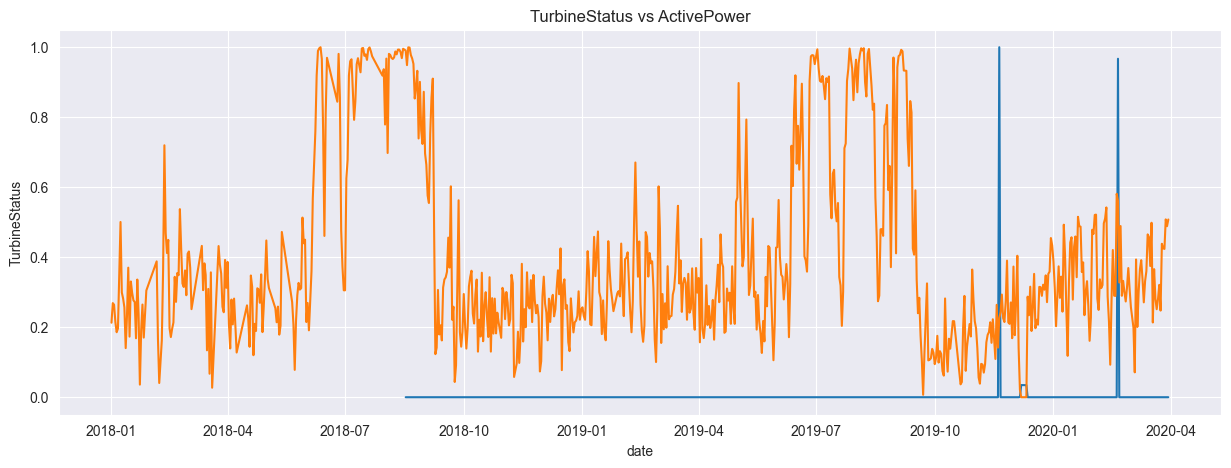

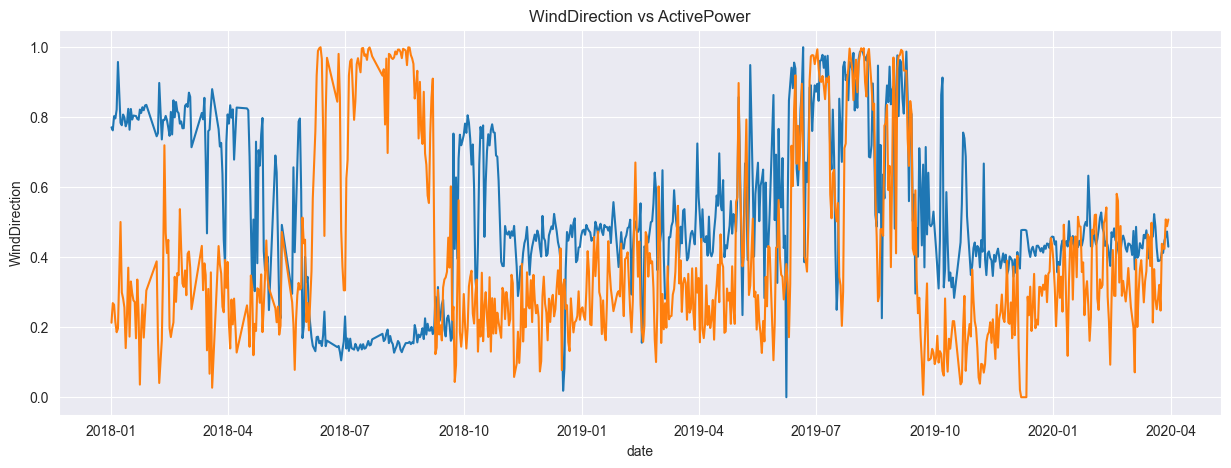

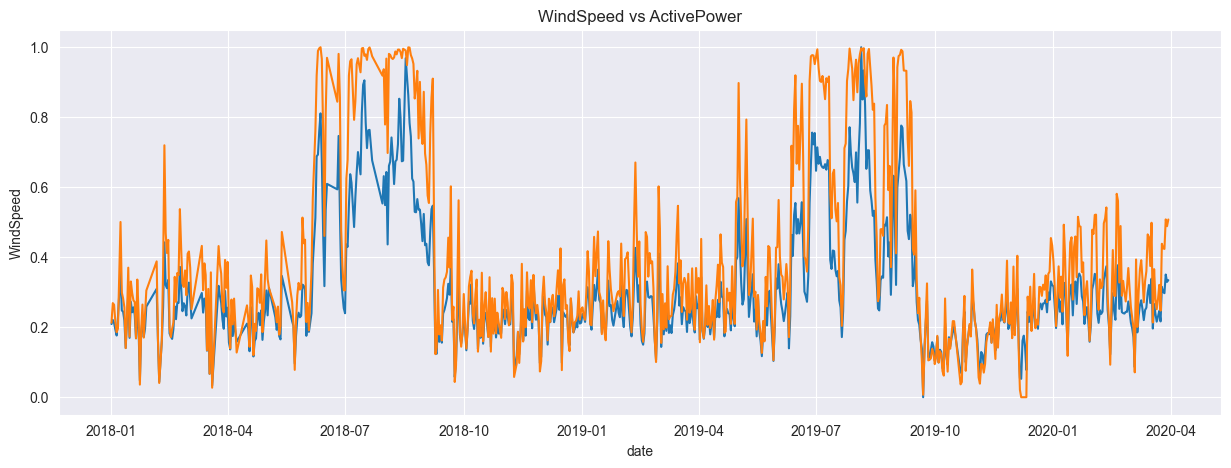

In [205]:
for i in features_required:
    fig,ax = plt.subplots(figsize=(15,5))
    sns.lineplot(ax=ax,x=df_9.index,y=df_9[i])
    sns.lineplot(ax=ax,x=df_9.index,y=df_9[target_required])
    ax.set(title=i+" vs "+target_required)

<Axes: >

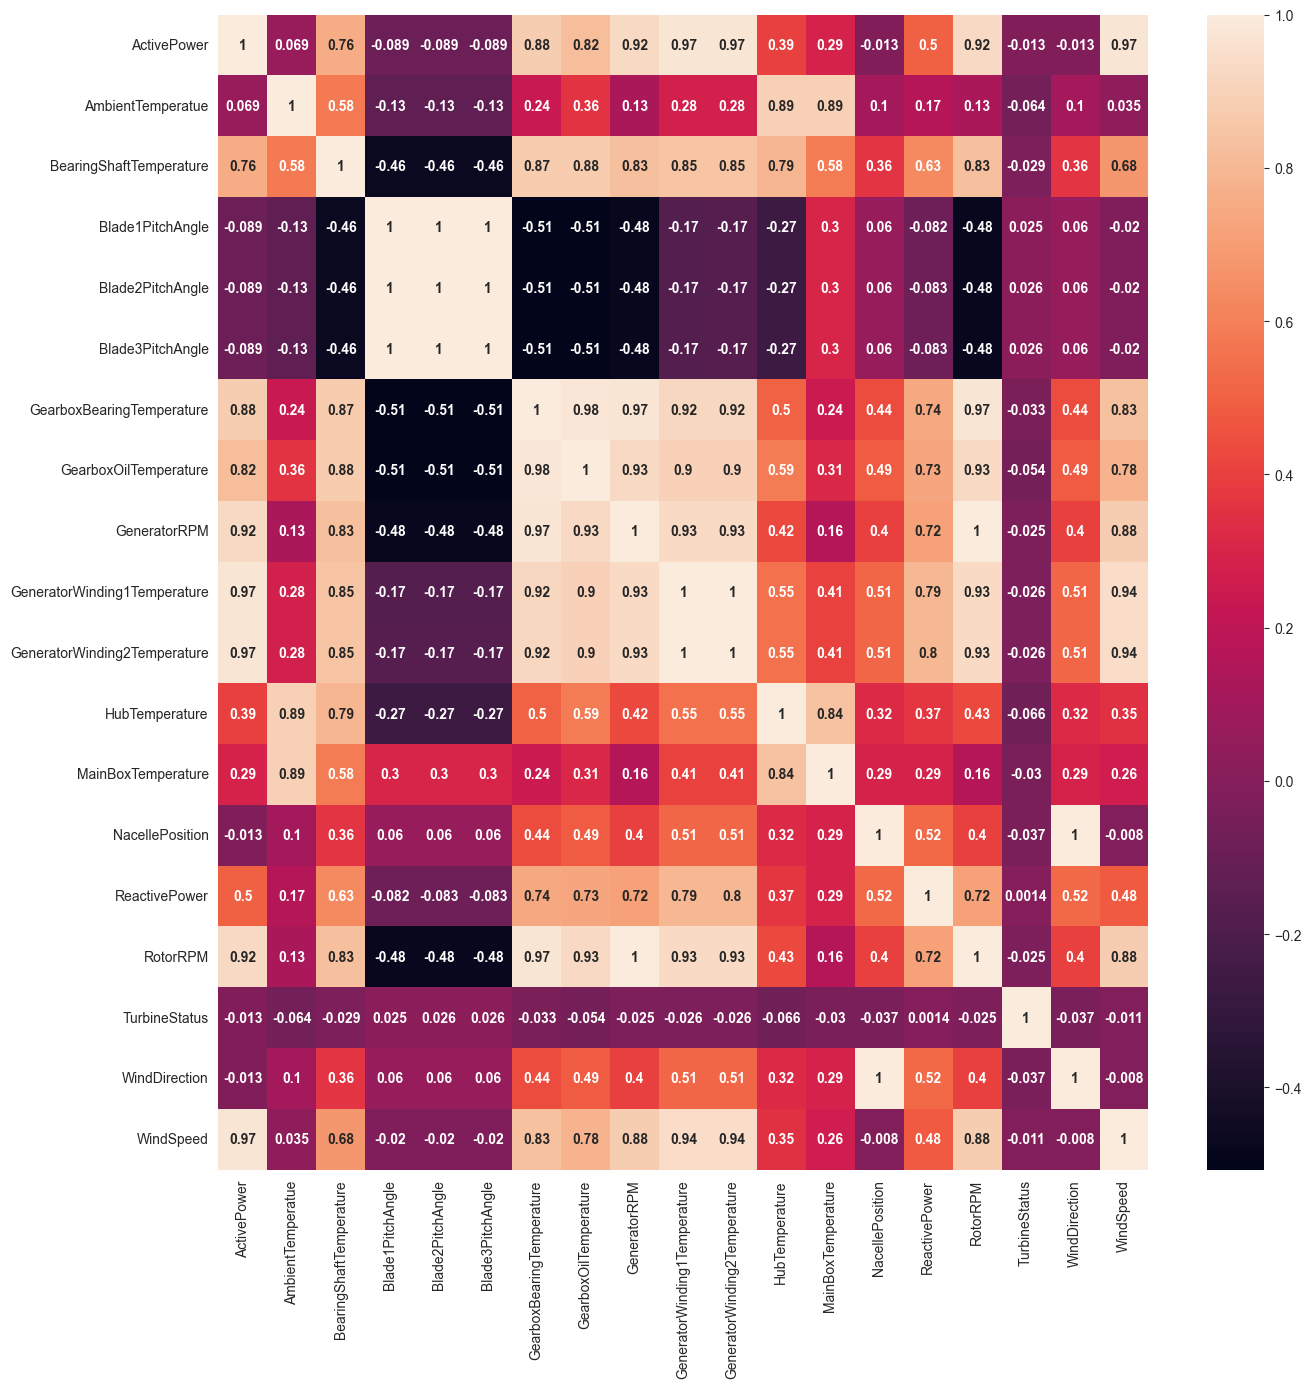

In [206]:
corr_matrix = df_9.corr()
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,ax=ax,annot_kws={"weight":"bold"})

In [207]:
corr_matrix_sorted = corr_matrix["ActivePower"].sort_values(ascending=False)
final_columns = corr_matrix_sorted.iloc[0:2].index.values.tolist()
final_columns

['ActivePower', 'WindSpeed']

In [208]:
df_final = df_4[final_columns]
df_final.dropna(inplace=True)

In [209]:
df_final

,ActivePower,WindSpeed
Unnamed: 0,,
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363
...,...,...
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839


In [210]:
train_length = round(len(df_final) * 0.75)
train_length

59011

In [211]:
X_train = df_final.iloc[:train_length,1]
X_test = df_final.iloc[train_length:,1]
y_train = df_final.iloc[:train_length,0]
y_test = df_final.iloc[train_length:,0]

In [219]:
xgb_regr = XGBRegressor(n_estimators=200)

In [220]:
xgb_regr.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=2,verbose=True)

[0]	validation_0-rmse:435.70937	validation_1-rmse:386.54013
[1]	validation_0-rmse:310.65130	validation_1-rmse:280.57808
[2]	validation_0-rmse:225.25410	validation_1-rmse:208.61759
[3]	validation_0-rmse:168.22416	validation_1-rmse:160.85528
[4]	validation_0-rmse:131.51710	validation_1-rmse:130.19471
[5]	validation_0-rmse:109.09650	validation_1-rmse:111.30755
[6]	validation_0-rmse:96.21067	validation_1-rmse:100.10655
[7]	validation_0-rmse:89.21380	validation_1-rmse:93.63592
[8]	validation_0-rmse:85.57032	validation_1-rmse:89.93154
[9]	validation_0-rmse:83.71948	validation_1-rmse:87.80270
[10]	validation_0-rmse:82.79818	validation_1-rmse:86.56178
[11]	validation_0-rmse:82.34013	validation_1-rmse:85.81596
[12]	validation_0-rmse:82.11367	validation_1-rmse:85.35732
[13]	validation_0-rmse:81.99798	validation_1-rmse:85.06701
[14]	validation_0-rmse:81.94085	validation_1-rmse:84.88309
[15]	validation_0-rmse:81.91207	validation_1-rmse:84.76345
[16]	validation_0-rmse:81.89775	validation_1-rmse:84.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [221]:
y_pred = xgb_regr.predict(X_test)

In [222]:
y_pred

array([820.56757 , 615.7462  , 626.96844 , ...,  44.603733,  35.06662 ,
        50.395004], dtype=float32)

In [223]:
target_df = pd.DataFrame(columns=["Actual","Predicted"],index=y_test.index)
target_df["Actual"] = y_test.copy()
target_df["Predicted"] = y_pred.copy()

In [224]:
target_df

,Actual,Predicted
Unnamed: 0,,
2019-09-24 02:50:00+00:00,758.268904,820.567566
2019-09-24 03:00:00+00:00,603.322136,615.746216
2019-09-24 03:10:00+00:00,574.104500,626.968445
2019-09-24 03:20:00+00:00,623.087376,699.866333
2019-09-24 03:30:00+00:00,706.587516,720.349731
...,...,...
2020-03-30 23:10:00+00:00,70.044465,60.841900
2020-03-30 23:20:00+00:00,40.833474,35.066620
2020-03-30 23:30:00+00:00,20.777790,44.603733


In [225]:
r2_score_xgboost = r2_score(target_df["Actual"],target_df["Predicted"])
mean_absolute_error_xgboost = mean_absolute_error(target_df["Actual"],target_df["Predicted"])
mean_squared_error_xgboost = mean_squared_error(target_df["Actual"],target_df["Predicted"])
mean_absolute_percentage_error_xgboost = mean_absolute_percentage_error(target_df["Actual"],target_df["Predicted"])

In [230]:
print("R2 score                        :  ",r2_score_xgboost)
print("Mean Absolute Error             :  ",mean_absolute_error_xgboost)
print("Mean Squared Error              :  ",mean_squared_error_xgboost)
print("Root Mean Squared Error         :  ",np.sqrt(mean_squared_error_xgboost))
print("Mean Absolute Percentage Error  :  ",mean_absolute_percentage_error_xgboost)

R2 score                        :   0.9637872947387949
Mean Absolute Error             :   53.90089657244341
Mean Squared Error              :   7141.958543926014
Root Mean Squared Error         :   84.5101091226725
Mean Absolute Percentage Error  :   2.5579880438552224e+16
